In [1]:
import torch

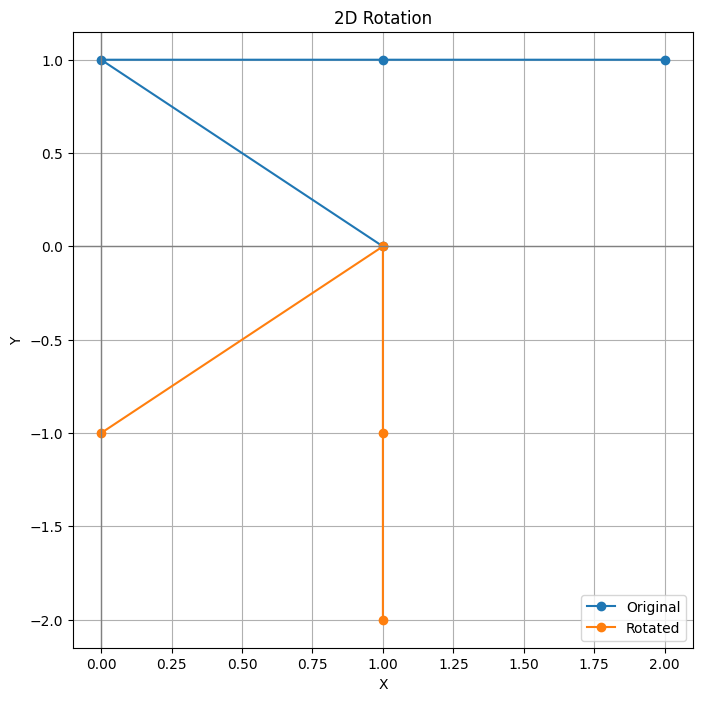

In [2]:
import torch
import matplotlib.pyplot as plt

# Define a 2D rotation matrix function
def rotation_matrix(theta):
    """ Create a 2D rotation matrix for a given angle theta (in radians) """
    return torch.tensor([[torch.cos(theta), -torch.sin(theta)],
                         [torch.sin(theta), torch.cos(theta)]], dtype=torch.float32)

# Define the angle of rotation (in radians)
theta = torch.tensor(torch.pi / 2)  # 45 degrees

# Create a 2D rotation matrix
rot_matrix = rotation_matrix(theta)

# Define a target matrix (a set of 2D points)
target_matrix = torch.tensor([[1, 0], [0, 1], [1, 1], [2, 1]], dtype=torch.float32)

# Rotate the target matrix
rotated_matrix = torch.matmul(target_matrix, rot_matrix)

# Plotting the original and rotated matrices
plt.figure(figsize=(8, 8))
plt.plot(target_matrix[:, 0], target_matrix[:, 1], 'o-', label='Original')
plt.plot(rotated_matrix[:, 0], rotated_matrix[:, 1], 'o-', label='Rotated')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid(True)
plt.legend()
plt.title("2D Rotation")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



In [3]:
import torch
import math

# Function to create a rotation matrix for RoPE
def get_rotation_matrix(angle, device):
    return torch.tensor([[torch.cos(angle), -torch.sin(angle)], 
                         [torch.sin(angle), torch.cos(angle)]], device=device)

# Function to apply RoPE to an embedding
def apply_rope(embedding, position, device):
    angle = torch.tensor(position * math.pi / 2 )  # Simplified angle calculation
    rotation_matrix = get_rotation_matrix(angle, device)
    return torch.matmul(embedding, rotation_matrix)

# Main code
def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Sample embeddings for "I", "love", "you" (2D for simplicity)
    embeddings = torch.tensor([[1, 0], [0, 1], [1, 1]], dtype=torch.float32, device=device)

    # Apply RoPE to each embedding
    for i, embedding in enumerate(embeddings):
        rotated_embedding = apply_rope(embedding, i+1, device)  # Position starts from 1
        print(f"Original: {embedding}, Rotated: {rotated_embedding}")

if __name__ == "__main__":
    main()


Original: tensor([1., 0.]), Rotated: tensor([-4.3711e-08, -1.0000e+00])
Original: tensor([0., 1.]), Rotated: tensor([-8.7423e-08, -1.0000e+00])
Original: tensor([1., 1.]), Rotated: tensor([-1.,  1.])


In [4]:
torch.ones(6)

tensor([1., 1., 1., 1., 1., 1.])

In [5]:
from sentencepiece import SentencePieceProcessor
tokenizer = SentencePieceProcessor()
tokenizer.Load("tokenizer.model")

True

In [14]:
from model import Transformer, ModelArgs
import json

max_seq_len = 128
max_batch_size = 1
device = "cuda" if torch.cuda.is_available() else "cpu"

with open("params.json", "r") as f:
    params = json.loads(f.read())
    model_args = ModelArgs(
        max_seq_len=max_seq_len,
        max_batch_size=max_batch_size,
        device=device,
        **params
    )
    
model_args.vocab_size = tokenizer.vocab_size()
model = Transformer(model_args)
total_number = model.count_parameters()
print(f"Total parameters: {total_number}") 

Total parameters: 6738415616
